# Disciplina: Pesquisa Operacional
Instituto Federal do Norte de Minas Gerais Campus Montes Claros <br/>
Curso: Ciência da Computação <br/>
Professora: Luciana Balieiro Cosme<br/>
**Aula 7: Programação linear inteira - PLI** <br/>


PLI são classes de problemas em que um ou mais variáveis são inteiras ou discretas, entretanto, os algoritmos podem nao ser consistentes na resolução de problemas com inteiro, muito embora seja teoricamente comprovado que esses algoritmos convergem em número finito de interações.

O algoritmo branch-and-bound(B&B) é um dos mais eficiente em termos de cálculo e bem aceito comercialmente.

Considere o seguinte problema ilustrativo para PLI:

max $5 x_{1} +  4 x_{2} $

Sujeito às restrições:

$x_{1} + x_{2} \leq 5$

$10x_{1} + 6x_{2} \leq 45$

$x_{1}, x_{2}$ não negativas e inteiras.



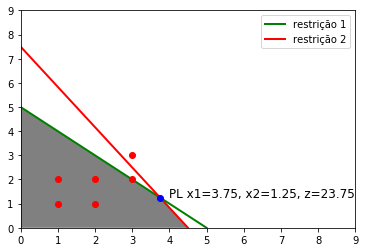

In [25]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

x1=[5, 0]
x2=[0, 5]


x3=[4.5, 0]
x4=[0, 7.5]

plt.figure()
axes = plt.gca()
plt.plot(x1, x2, 'g-', linewidth=2, markersize=1, label='restrição 1')
plt.plot(x3,x4, 'r-',linewidth=2, markersize=1, label='restrição 2')
plt.axis([0, 9, 0, 9])
plt.legend()
axes.add_patch(Polygon([(0, 0), (0, 5), (3.75, 1.25), (4.5, 0)],
                      closed=True, facecolor='gray'))

plt.text(4 , 1.25, "PL x1=3.75, x2=1.25, z=23.75",horizontalalignment='left', fontsize=12)
plt.plot([3.75], [1.25], 'bo')

plt.plot([1,2,3,2,3,1], [1,2,3,1,2,2], 'ro')

plt.show()

Temos a figura acima que representa o problema graficamente. A primeira restrição é a reta na cor verde, a segunda restricão é a reta na cor vermelha. O ponto na cor azul representa a solução ótima pela programação linear convencional e os pontos na cor vermelha representa alguns pontos (factíveis e não factíveis) que são inteiros e, por isso, os pontos factíveis são candidatos a solução ótima inteira.

Como a solução PL não satisfaz os requisitos inteiros, utilizaremos o algoritmo B&B para identificar a solução inteira ótima. O primeiro passo do processo consiste em selecionar uma variável arbitariamente, que seja solução no problema original, e modificá-la de forma a termos duas regiões. Como $x_1=3.75$, sabemos que não há nenhuma solução possível acima de 3 e menor que 4. Portanto, podemos reformular o problema da seguinte maneira:

**Problema 1**

max $5 x_{1} +  4 x_{2} $

Sujeito às restrições:

$x_{1} + x_{2} \leq 5$

$10x_{1} + 6x_{2} \leq 45$

$x_{1} \leq 3$

$x_{1}, x_{2} \geq 0$

**Problema 2**

max $5 x_{1} +  4 x_{2} $

Sujeito às restrições:

$x_{1} + x_{2} \leq 5$

$10x_{1} + 6x_{2} \leq 45$

$x_{1} \geq 4$

$x_{1}, x_{2} \geq 0$



Do ponto de vista da programação linear inteira, com os espaços combinados nenhuma solução foi perdida, o que torna essa nova abordagem equivalente. Se usarmos essa técnica sucessivamente para eliminar regiões que não são viáveis inteiras, encontraremos a solucão ótima. As novas restrições são mutuamente exclusivas e essa dicotomização dá origem ao conceito de ramificação no B&B, e nesse caso, $x_1$ é chamada de **variável de ramificação**.
 
A **solução PL do problema 1**, que pode ser resolvida como de costume, é $x_1=3$, $x_2=2$, $z=23$.

A solução do problema 1 atende aos requisitos inteiros para $x_1$ e $x_2$, portanto, ela é uma solução candidata. Podemos então afirmar que a  solução do problema 1 é um limite inferior. Já a **solução do problema 2** será útil apenas se for maior que $z=23$. Como já sabemos que a solução contínua é $z=23.75$,  é possível descartar o segundo problema pois ele não poderá oferecer um valor maior que $23$ e menor que $23.75$.

Mesmo assim, iremos examinar o segundo modelo.

A **solução PL do problema 2**, que pode ser resolvida como de costume, é $x_1=4$, $x_2=0.83$, $z=23.33$. Como não encontramos uma solução inteira, vamos repetir o processo e separar o problema original em duas partes. Como $x_1$ é inteiro, redefiniremos $x_2$, considerando que $x_{1} \geq 4$, relativo ao problema 2.

**Problema 3**

max $5 x_{1} +  4 x_{2} $

Sujeito às restrições:

$x_{1} + x_{2} \leq 5$

$10x_{1} + 6x_{2} \leq 45$

$x_{1} \geq 4$

$x_{2} \leq 0$

$x_{1}, x_{2} \geq 0$

**Problema 4**

max $5 x_{1} +  4 x_{2} $

Sujeito às restrições:

$x_{1} + x_{2} \leq 5$

$10x_{1} + 6x_{2} \leq 45$

$x_{1} \geq 4$

$x_{2} \geq 1$

$x_{1}, x_{2} \geq 0$

Temos que, a **solução PL do problema 3** é  $x_1=4.5$, $x_2=0$, $z=22.5$.  Já a **solução PL do problema 4** não é possível.


Repetindo o processo:

**Problema 5**

max $5 x_{1} +  4 x_{2} $

Sujeito às restrições:

$x_{1} + x_{2} \leq 5$

$10x_{1} + 6x_{2} \leq 45$

$x_{2} \leq 0$

$x_{1} \geq 4$

$x_{1} \leq 4$

$x_{1}, x_{2} \geq 0$

**Problema 6**

max $5 x_{1} +  4 x_{2} $

Sujeito às restrições:

$x_{1} + x_{2} \leq 5$

$10x_{1} + 6x_{2} \leq 45$

$x_{2} \leq 0$

$x_{1} \geq 4$

$x_{1} \geq 5$

$x_{1}, x_{2} \geq 0$


Temos que, a **solução PL do problema 5** é  $x_1=4$, $x_2=0$, $z=20$, inferior ao problema 1.  A **solução PL do problema 6** não é possível. Portanto, a solução de PLI é $z=23$, encontrado no problema 1.


**Responda**:

1 - Qual seria o resultado se a primeira variável de ramificação fosse $x_2$?

2 - Se no exemplo acima selecionarmos o problema 2 em primeiro lugar, qual seria a implicação para a solução do problema?

Bibliografia:
    
    TAHA, Hamdy A. Pesquisa Operacional. 8a edição. Pearson, 2008.
    
    MOREIRA, Daniel A. Pesquisa Operacional. 2a edição revista e atualizada. Cengage Learning, 2010.